In [45]:
# The main purpose of this viz is to plot the Expected goals(xG) of Nigeria and its opponent for AFCON 2023, and i am going to use a rolling line chart for the viz
# This viz was inspired by Son of a corner
# The dataset is a small one so instead of web scraping i just typed it out from Statsbomb, if saves me from unncessary stress i mean
# if you are interested in exploring football data, you can check Statsbomb open data https://github.com/statsbomb/open-data/tree/master?tab=readme-ov-file

In [1]:
# install a package created by Peter McKeever's and Danzn's 
# This is the link to the package if you are interested in using it in your viz. It's really cool actually 
# https://github.com/znstrider/highlight_text?tab=readme-ov-file
pip install highlight-text

Note: you may need to restart the kernel to use updated packages.


In [101]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
from PIL import Image
import urllib
from highlight_text import HighlightText, ax_text, fig_text

In [102]:
# Dataframe
data = {
    'home_team': ['Nigeria', 'Ivory Coast', 'Guinea-Bissau', 'Nigeria', 'Nigeria', 'Nigeria', 'Nigeria'],
    'away_team': ['Equatorial Guinea', 'Nigeria', 'Nigeria', 'Cameroon', 'Angola', 'South Africa', 'Ivory Coast'],
    'home_team_xg': [3.52, 0.57, 0.44, 1.38, 1.12, 1.49, 0.29],
    'away_team_xg': [0.26, 1.72, 0.84, 0.28, 0.93, 1.67, 1.45],
    'date': ['14/01/2024', '18/01/2024', '22/01/2024', '27/01/2024', '02/02/2024', '07/02/2024', '11/02/2024'],
    'fifa_ranking_home_team': [30, 38, 116, 30, 30, 30, 30],
    'fifa_ranking_away_team': [79, 30, 30, 51, 94, 59, 38],
    'goals_home_team': [1, 0, 0, 2, 1, 1, 1],
    'goals_away_team': [1, 1, 1, 0, 0, 1, 2]
}

df = pd.DataFrame(data)


In [103]:
# Check the dataframe columns
df.columns

Index(['home_team', 'away_team', 'home_team_xg', 'away_team_xg', 'date',
       'fifa_ranking_home_team', 'fifa_ranking_away_team', 'goals_home_team',
       'goals_away_team'],
      dtype='object')

In [106]:
df

,home_team,away_team,home_team_xg,away_team_xg,date,fifa_ranking_home_team,fifa_ranking_away_team,goals_home_team,goals_away_team
0,Nigeria,Equatorial Guinea,3.52,0.26,2024-01-14,30,79,1,1
1,Ivory Coast,Nigeria,0.57,1.72,2024-01-18,38,30,0,1
2,Guinea-Bissau,Nigeria,0.44,0.84,2024-01-22,116,30,0,1
3,Nigeria,Cameroon,1.38,0.28,2024-01-27,30,51,2,0
4,Nigeria,Angola,1.12,0.93,2024-02-02,30,94,1,0
5,Nigeria,South Africa,1.49,1.67,2024-02-07,30,59,1,1
6,Nigeria,Ivory Coast,0.29,1.45,2024-02-11,30,38,1,2


In [107]:
# Filter dataframe to include matches where Nigeria is either home or away
df_nigeria = df[(df['home_team'] == 'Nigeria') | (df['away_team'] == 'Nigeria')].reset_index(drop=True)

# Extract xG for Nigeria
xG_for = df_nigeria['home_team_xg'].where(df_nigeria['home_team'] == 'Nigeria', other=df_nigeria['away_team_xg']).reset_index(drop=True)

# Extract xG against Nigeria
xG_ag = df_nigeria['away_team_xg'].where(df_nigeria['home_team'] == 'Nigeria', other=df_nigeria['home_team_xg']).reset_index(drop=True)

# Reindex xG_ag to align its indices with xG_for
xG_ag = xG_ag.reindex(range(len(xG_for)))

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Sort data by match dates
df = df.sort_values(by='date')

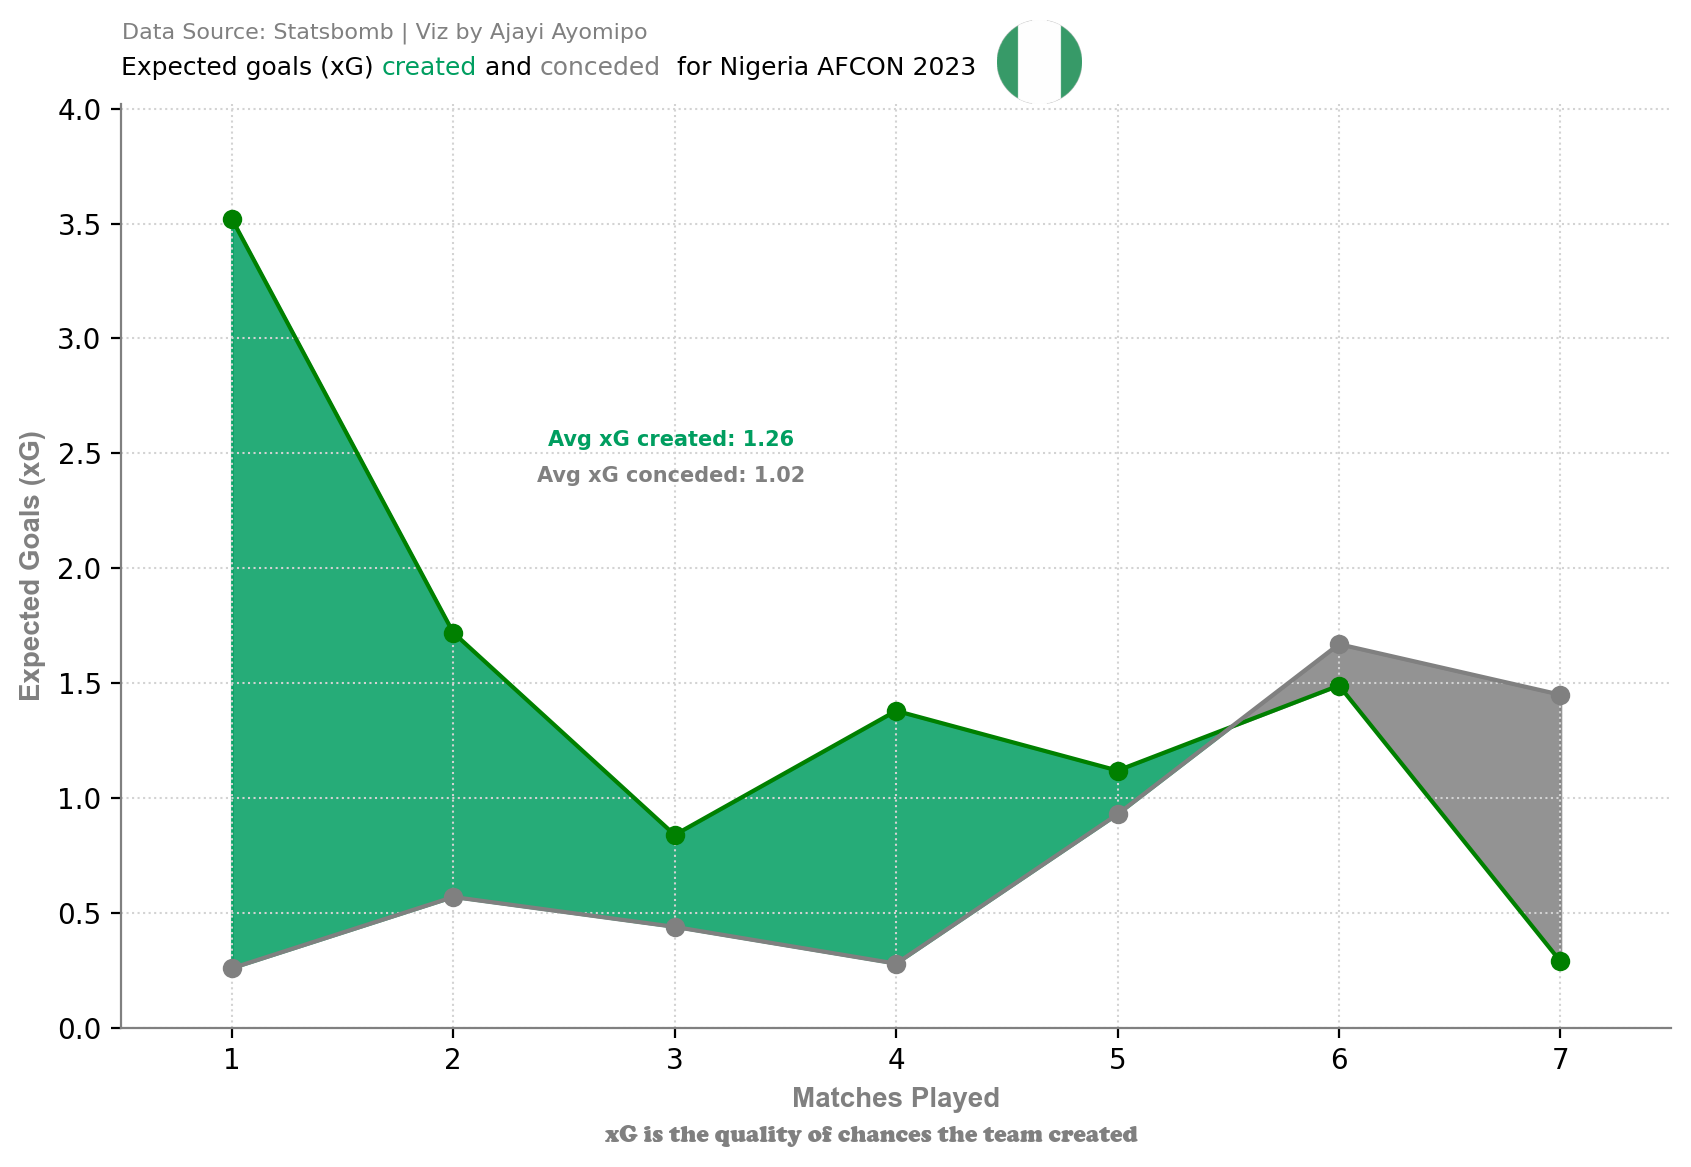

In [108]:
# Plot viz
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)

# Plot xG data for Nigeria 
ax.plot(df.index + 1, xG_for, label='xG for Nigeria', color='green', marker='o')

# Plot xG data for Nigeria's opponents
ax.plot(df.index + 1, xG_ag, label='xG against Nigeria', color='grey', marker='o')

# Set labels for the x-axis and y-axis
ax.set_xlabel('Matches Played', fontsize=10, fontweight='bold', fontfamily='Arial', color='grey')
ax.set_ylabel('Expected Goals (xG)', fontsize=10, fontweight='bold', fontfamily='Arial', color='grey')

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")


# Set the grid
ax.grid(
    visible=True, 
    lw=0.75,
    ls=":",
    color="lightgrey"
)

# Fill between where xG created is higher (green)
ax.fill_between(
    xG_for.index + 1,
    xG_ag,
    xG_for, 
    where=xG_for > xG_ag, 
    interpolate=True,
    alpha=0.85,
    color='#009E60',
)

# Fill between where xG conceded is higher (grey)
ax.fill_between(
    xG_for.index + 1,
    xG_ag,
    xG_for, 
    where=xG_ag > xG_for, 
    interpolate=True,
    alpha=0.85,
    color='grey',

)
# Customize title label using Peter McKeever's and Danzn's highlight_text package
main_title = 'Expected goals (xG) <created> and <conceded>  for Nigeria AFCON 2023'
fig_text(0.125, 0.9, main_title, fontsize=9, va='bottom', highlight_textprops=[{"color": "#009E60"}, {"color": "grey"}])

additional_text = 'Data Source: Statsbomb | Viz by Ajayi Ayomipo'
fig.text(0.257, 0.93, additional_text, fontsize=8, va='bottom', ha='center', color='grey')

# brief explanation of what xG means
fig.text(0.5, 0.02, "xG is the quality of chances the team created", color='grey', fontsize=8.5, ha='center', va='center', weight='bold', fontfamily='Cooper Black')

# The average xG created 
fig.text(0.4, 0.6, "Avg xG created: 1.26", color='#009E60', fontsize=7.5, ha='center', va='center', weight='bold')

# The average xG conceded 
fig.text(0.4, 0.57, "Avg xG conceded: 1.02", color='grey', fontsize=7.5, ha='center', va='center', weight='bold')

# Set the limits for x-axis and y-axis
ax.set_xlim(0.5, len(df) + 0.5)
ax.set_ylim(0, max(xG_for.max(), xG_ag.max()) + 0.5)

# Add the Nigeria team logo to the plot
# I used the Nigeria's logo from fotmoob
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
logo_ax = fig.add_axes([0.534, 0.88, 0.10, 0.070], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}6346.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

plt.savefig("NigeriaxGAFCON2023.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


In [61]:
# I love this gameeeeeeeeeeeeeeeee
